## Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## About Data Set[ Train Data Set]

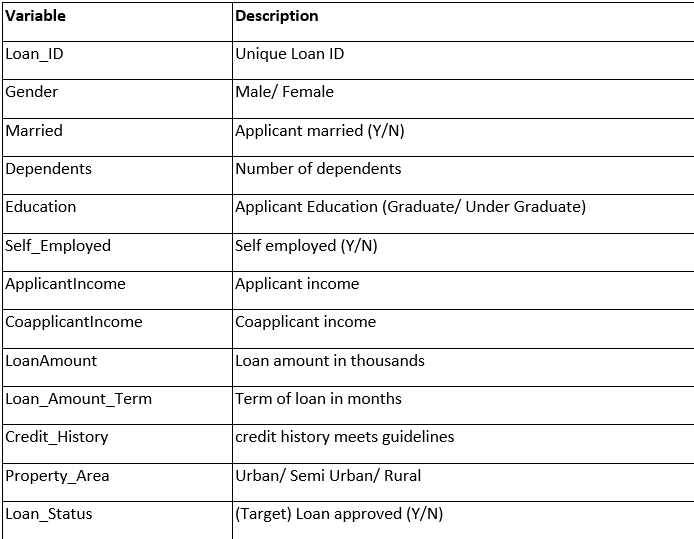

## Load Libraries

In [308]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import numpy as np


import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [309]:
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Load DataSet

In [310]:
df=pd.read_csv('train_ctrUa4K.csv')

In [311]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [312]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
429,LP002370,Male,No,0,Not Graduate,No,2717,0.0,60.0,180.0,1.0,Urban,Y
478,LP002531,Male,Yes,1,Graduate,Yes,16667,2250.0,86.0,360.0,1.0,Semiurban,Y
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
141,LP001498,Male,No,0,Graduate,No,5417,0.0,168.0,360.0,1.0,Urban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
411,LP002319,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y
353,LP002142,Female,Yes,0,Graduate,Yes,5500,0.0,105.0,360.0,0.0,Rural,N
388,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y


In [313]:
# number of rows and columns
df.shape

(614, 13)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleanup

In [315]:
## check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [316]:
## missing values in percentage
percentage_missing=df.isnull().sum()*100/len(df)

## Handling Missing Values
- We will use sklearn impute class to handle missing data

In [317]:
percentage_missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

We have very small percentage of missing values, but since the rows are not many, we will impute instead of dropping these rows

In [318]:
from sklearn.impute import SimpleImputer


#### Missing Values Categorical Data

In [319]:

imputer = SimpleImputer(strategy='most_frequent')

df['Gender'] = imputer.fit_transform(df[['Gender']])
df['Dependents'] = imputer.fit_transform(df[['Dependents']])
df['Married'] = imputer.fit_transform(df[['Married']])
df['Education'] = imputer.fit_transform(df[['Education']])
df['Self_Employed'] = imputer.fit_transform(df[['Self_Employed']])
df['Property_Area'] = imputer.fit_transform(df[['Property_Area']])


#### Missing Values Numerical Data

In [320]:

imp_mean = SimpleImputer(strategy='mean')

df['LoanAmount'] = imp_mean.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = imp_mean.fit_transform(df[['Loan_Amount_Term']])

imp_mode = SimpleImputer(strategy='most_frequent')
df['Credit_History']= imp_mode.fit_transform(df[['Credit_History']])

In [321]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Drop Loan ID Column

In [322]:
df.drop('Loan_ID',axis=1,inplace=True)

## Generate Summary Statistics

In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [324]:
df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


## Data Exploration and Visualization

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

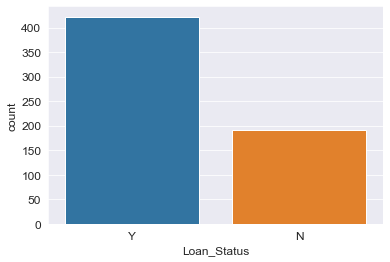

In [325]:
## Target Value
sns.countplot(x=df['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

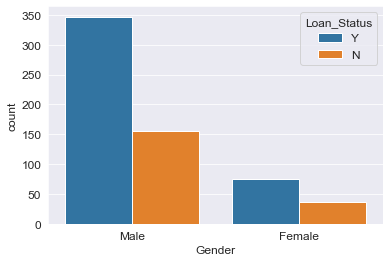

In [326]:
# Gender
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

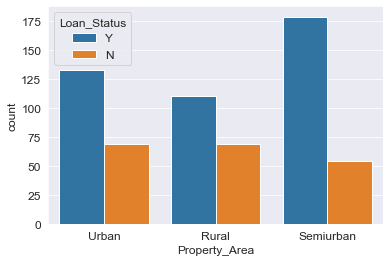

In [327]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

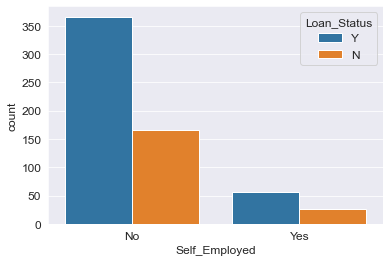

In [328]:
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

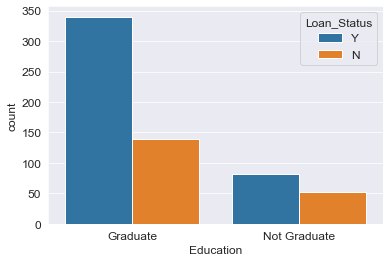

In [329]:
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

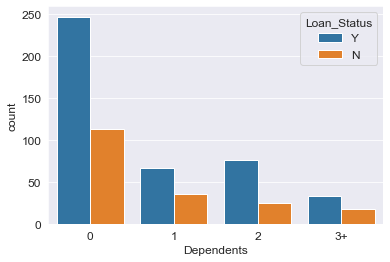

In [330]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])

In [331]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Will need to convert Dependents to Categorical Data

<AxesSubplot:xlabel='Married', ylabel='count'>

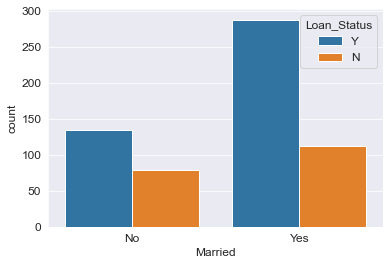

In [332]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

## Distribution

In [333]:
num=df.select_dtypes(exclude=['object'])

In [334]:
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.000000,146.412162,360.0,1.0
1,4583,1508.000000,128.000000,360.0,1.0
2,3000,0.000000,66.000000,360.0,1.0
3,2583,2358.000000,120.000000,360.0,1.0
4,6000,0.000000,141.000000,360.0,1.0
5,5417,4196.000000,267.000000,360.0,1.0
6,2333,1516.000000,95.000000,360.0,1.0
7,3036,2504.000000,158.000000,360.0,0.0
8,4006,1526.000000,168.000000,360.0,1.0
9,12841,10968.000000,349.000000,360.0,1.0


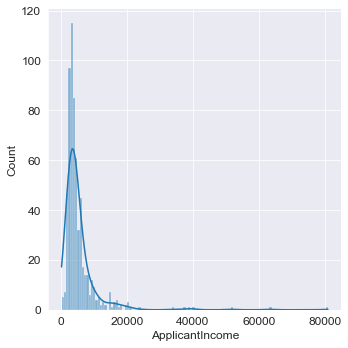

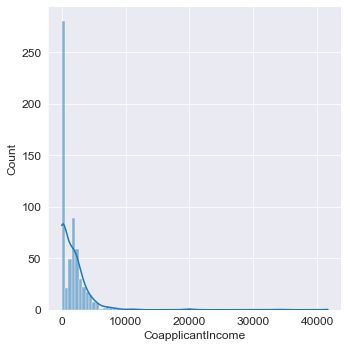

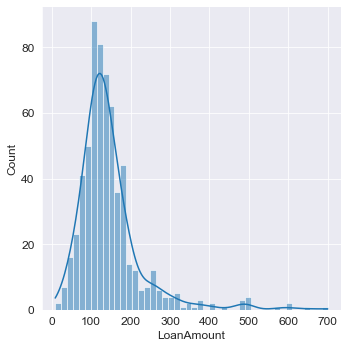

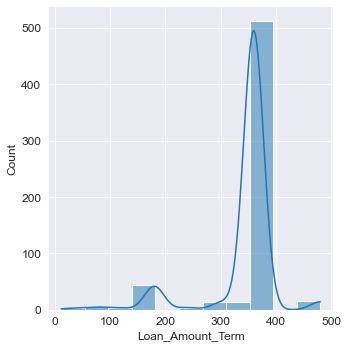

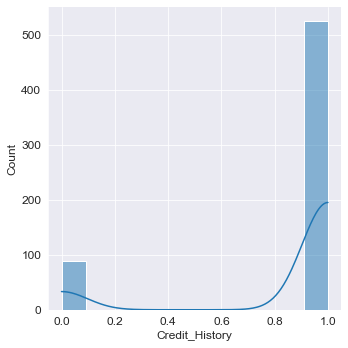

In [335]:
## Distribution plots for numerical data
for i in range(len(num.columns)):   
    sns.displot(num.iloc[:,i],kde=True)
    plt.xlabel(num.columns[i])

plt.tight_layout()
plt.show()

<AxesSubplot:>

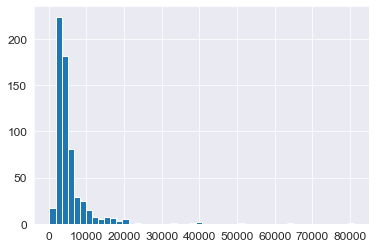

In [336]:
df['ApplicantIncome'].hist(bins=50)

 Applicant income is highly skewed. Plot the box plot

## Skewness

- Skewness tells us about the direction of outliers and we know that outliers adversely affect a model’s performance, especially regression-based models. 

- While there are statistical models that are robust enough to handle outliers like tree-based models, you’ll be limited in what other models you can try. So what do you do? You’ll need to transform the skewed data so that it becomes a Gaussian (or normal) distribution. Removing outliers and normalizing our data will allow us to experiment with more statistical models.


- ApplicantIncome,CoApplicantincome and LoanAmount are right skewed(positively skewed)
- If skewness value lies above +1 or below -1, data is highly skewed. If it lies between +0.5 to -0.5, it is moderately skewed. If the value is 0, then the data is symmetric

In [337]:
print('The loan amount skewness is',df['LoanAmount'].skew())
print('The Applicant amount skewness is',df['ApplicantIncome'].skew())
print('The CoApplicant amount skewness is',df['CoapplicantIncome'].skew())

The loan amount skewness is 2.726601144105299
The Applicant amount skewness is 6.539513113994625
The CoApplicant amount skewness is 7.491531216657306


## Treating Skewness

- Common transformations of positively skewed data includes square root, cube root, and log.

- Common transformations include square , cube root and logarithmic.



In [338]:
df['LoanAmount']=np.log(df['LoanAmount']+1)
df['ApplicantIncome']=np.log(df['ApplicantIncome']+1)
df['CoapplicantIncome']=np.log(df['CoapplicantIncome']+1)

In [339]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y


In [ ]:
#df['LoanAmount']=np.sqrt(df['LoanAmount'])
#df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
#df['CoApplicantIncome']=np.sqrt(df['CoapplicantIncome'])

you should remember what transformation you’ve performed on which attribute, because you’ll have to reverse it once when making predictions, 

<AxesSubplot:>

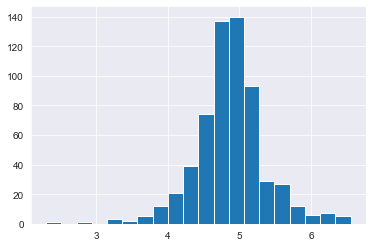

In [34]:
df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

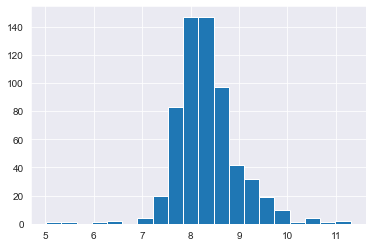

In [35]:
df['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

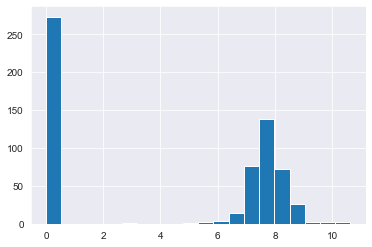

In [36]:
df['CoApplicantIncome'].hist(bins=20)

<AxesSubplot:>

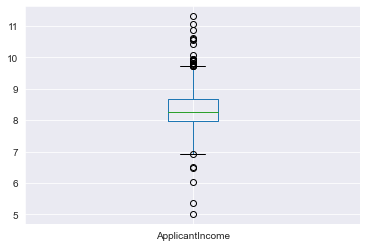

In [37]:

df.boxplot(column='ApplicantIncome')

<AxesSubplot:>

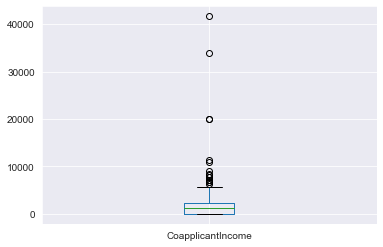

In [39]:
df.boxplot(column='CoapplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society

<AxesSubplot:>

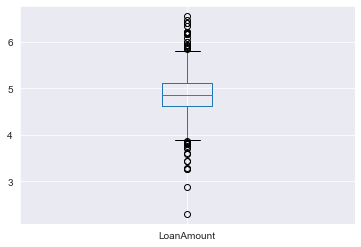

In [38]:
df.boxplot(column='LoanAmount')

## Handling Outliers

Naive Bayes Clsasifier -----------------> Not sensitive to outlers

SVM ------------------------------------> Not sensitive to Outliers

Linear Regression ----------------------> Sensitive To Outliers

Logistic Regression --------------------> Sensitive To Outliers

Decision Tree Regressor/Classifier -----> Not Sensitive To Outliers

Ensemble Technique(RF, XGBOOST, GB) ----> Not Sensitive To Outlers

KNN -----------------------------------> Not Sensitive To Outliers

K-Means --------------------------------> Sensitive To Outliers (bcz, we use euclidien distance and clusters that are created is based on the outliers also)

Hierarchal -----------------------------> Sensitive To Outliers

PCA ------------------------------------> Sensitive To Outliers (We focus on the variance part, if we have more outliers then the whole variance is not getting captured

DBSCAN ---------------------------------> Sensitive To Outliers

Neural Networks ------------------------> Sensitive To Outliers

- If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier
- If the outlier does not change the results but does affect assumptions, you may drop the outlier.
- More commonly, the outlier affects both results and assumptions.  In this situation, it is not legitimate to simply drop the outlier.  You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed.
- If the outlier creates a strong association, you should drop the outlier and should not report any association from your analysis.

In [307]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CoApplicantIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341510,1621.245798,4.870872,342.000000,0.855049,4.290129
std,0.645035,2926.248369,0.491376,64.372489,0.352339,3.875873
min,5.017280,0.000000,2.302585,12.000000,0.000000,0.000000
25%,7.965024,0.000000,4.617584,360.000000,1.000000,0.000000
50%,8.246303,1188.500000,4.867534,360.000000,1.000000,7.081125
75%,8.664922,2297.250000,5.110477,360.000000,1.000000,7.739897
max,11.302217,41667.000000,6.552508,480.000000,1.000000,10.637489


In [110]:
#high_quant = df.quantile(0.999)

#for i in df.columns:
#    df= df.drop(df[i][df[i]>high_quant[i]].index)

## Credit History vs Loan Status

In [237]:
 df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.790476


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

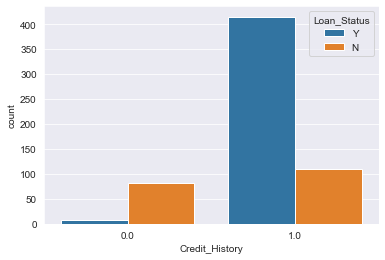

In [45]:
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'])

The probability of getting a loan with a bad credit history is very low

The probability of getting a loan with a good credit history is quite high

## Correlation

<AxesSubplot:>

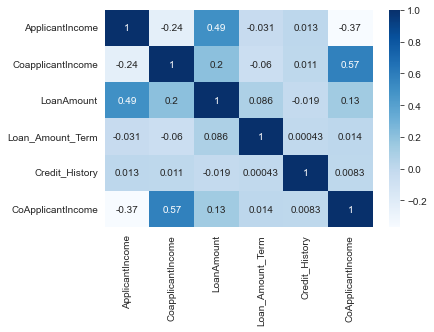

In [46]:
corr = df.corr(method="pearson")

sns.heatmap(corr,annot=True,cmap="Blues")

## Machine Learning

## Feature Engineering


In [47]:
from sklearn import preprocessing

## Target Variable

In [340]:
# replace Y with 1 and N with 0
df['Loan_Status'].replace({
    'Y':1,
    'N':0
},inplace=True)

In [341]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Need to balance the dataset

## Label Encoding for Categorical Variables with two levels

In [240]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CoApplicantIncome'],
      dtype='object')

In [342]:

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['Dependents']= label_encoder.fit_transform(df['Dependents']) 
df['Education']= label_encoder.fit_transform(df['Education']) 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed']) 
df['Property_Area']= label_encoder.fit_transform(df['Property_Area']) 
df['Married']= label_encoder.fit_transform(df['Married']) 

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
#le = LabelEncoder()
#for col in cols:
#    df[col] = le.fit_transform(df[col])

In [52]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [53]:
df['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [244]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoApplicantIncome
0,1,0,0,0,0,8.674197,0.0,4.993232,360.0,1.0,2,1,0.000000
1,1,1,1,0,0,8.430327,1508.0,4.859812,360.0,1.0,0,0,7.319202
2,1,1,0,0,1,8.006701,0.0,4.204693,360.0,1.0,2,1,0.000000
3,1,1,0,1,0,7.857094,2358.0,4.795791,360.0,1.0,2,1,7.765993
4,1,0,0,0,0,8.699681,0.0,4.955827,360.0,1.0,2,1,0.000000


## One hot encoding for categorical variables with multiple levels

## Handling Imbalanced data using SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

In [343]:
## Independent and Dependent Features
y=df[['Loan_Status']]


In [344]:
X=df.drop(['Loan_Status'],axis=1)

In [345]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1.0,2
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2
5,1,1,2,0,1,8.597482,8.342125,5.590987,360.0,1.0,2
6,1,1,0,1,0,7.755339,7.324490,4.564348,360.0,1.0,2
7,1,1,3,0,0,8.018625,7.826044,5.068904,360.0,0.0,1
8,1,1,2,0,0,8.295798,7.331060,5.129899,360.0,1.0,2
9,1,1,1,0,0,9.460476,9.302828,5.857933,360.0,1.0,1


In [346]:
sm = SMOTE(random_state=123)
X, y = sm.fit_resample(X, y)
y.value_counts()

Loan_Status
0              422
1              422
dtype: int64

In [347]:
X.shape

(844, 11)

In [348]:
y.shape

(844, 1)

## Split dataset

In [61]:
from sklearn.model_selection import train_test_split

In [349]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=43)

In [63]:
X_train.shape

(675, 12)

In [64]:
X_test.shape

(169, 12)

In [65]:
y_train.shape

(675, 1)

In [66]:
y_test.shape

(169, 1)

## Scale our data

In [350]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [351]:
X_train

array([[-2.02821014, -1.23999757, -0.68391946, ...,  0.26412016,
         0.54058918, -1.27303286],
       [ 0.49304556, -1.23999757, -0.68391946, ...,  0.26412016,
        -0.70990844, -0.01121615],
       [ 0.49304556,  0.80645319, -0.68391946, ..., -0.01532421,
         0.54058918,  1.25060056],
       ...,
       [-2.02821014, -1.23999757,  2.46366443, ...,  0.26412016,
         0.54058918, -1.27303286],
       [ 0.49304556,  0.80645319, -0.68391946, ...,  0.26412016,
         0.54058918, -0.01121615],
       [ 0.49304556, -1.23999757, -0.68391946, ...,  0.26412016,
         0.54058918, -1.27303286]])

In [352]:
X_test

array([[-2.02821014,  0.80645319, -0.68391946, ...,  0.26412016,
         0.54058918, -1.27303286],
       [-2.02821014,  0.80645319, -0.68391946, ...,  0.26412016,
         0.54058918, -0.01121615],
       [ 0.49304556,  0.80645319,  1.4144698 , ...,  0.26412016,
        -2.00360318,  1.25060056],
       ...,
       [ 0.49304556,  0.80645319,  2.46366443, ...,  0.26412016,
         0.54058918, -0.01121615],
       [-2.02821014, -1.23999757, -0.68391946, ...,  2.12708262,
        -1.23669107,  1.25060056],
       [-2.02821014, -1.23999757, -0.68391946, ...,  0.26412016,
        -2.00360318, -0.01121615]])

## Model training

## Modeling

In [353]:
"""
    K-Nearest Neighbors
    Support Vector Machines
    Decision Tree Classifiers
    Random Forests
    Naive Bayes
    Multi-layer perceptron
    Logistic Regression
    Gradient Boosting 
    Extra Tree 
    Adaboost
    Ridge
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
#from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

ml = [
    neighbors.KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LinearSVC(),
    GaussianNB(),
    #MLPClassifier(),
    RidgeClassifier(),
    AdaBoostClassifier(),
   GradientBoostingClassifier(),
    ExtraTreesClassifier(),
   RandomForestClassifier(),
    LogisticRegression()
]

In [354]:
def eval_model(algo ,X, y):
   
    # Fit model
    start = time.time()
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    end = time.time()
    # Evaluate model
    name = algo.__class__.__name__
#     print(name)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    duration = end - start
     
    
    return [name, accuracy, precision, recall, auc, f1_score, duration]

In [355]:
results = []

for algo in ml:
    results.append(eval_model(algo, X, y))
                   
performance = pd.DataFrame(results, 
                           columns=['Name', 'Accuracy', 'Precision', 'Recall', "AUC", "F1 Score", 'Run Time']
                          ).sort_values(by='Precision', ascending=False)
performance

,Name,Accuracy,Precision,Recall,AUC,F1 Score,Run Time
8,RandomForestClassifier,0.804734,0.774194,0.857143,0.805042,0.813559,0.118046
7,ExtraTreesClassifier,0.792899,0.763441,0.845238,0.793207,0.802260,0.097511
1,DecisionTreeClassifier,0.733728,0.729412,0.738095,0.733754,0.733728,0.003145
5,AdaBoostClassifier,0.751479,0.714286,0.833333,0.751961,0.769231,0.073060
0,KNeighborsClassifier,0.721893,0.703297,0.761905,0.722129,0.731429,0.008873
9,LogisticRegression,0.751479,0.694444,0.892857,0.752311,0.781250,0.016451
2,LinearSVC,0.751479,0.687500,0.916667,0.752451,0.785714,0.033953
4,RidgeClassifier,0.757396,0.686957,0.940476,0.758473,0.793970,0.002985
6,GradientBoostingClassifier,0.721893,0.679612,0.833333,0.722549,0.748663,0.075795
3,GaussianNB,0.715976,0.640625,0.976190,0.717507,0.773585,0.000000


## Select Model and Evaluate

High precision means that we have a high number of true positives.

Low precision means that we have a high number of false positives.

A low recall score can indicate that we have a high number of False Negatives

We are focused on reducing False Positives so that we don't give people who don't qualify for a loan money, which will be avoiding loss of business money. We will therefore look at the model with the Highest Precision. This ends up being a Random Forest Classifier

It also has the highest F1 score

In [356]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
    # train the model
    model.fit(X_train, y_train)
    print("Accuracy:", model.score(X_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [357]:
from sklearn import metrics

In [358]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 75.7396449704142
CV Score: 71.32854325162018


In [359]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 76.33136094674556
CV Score: 74.16666666666667


In [360]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
classify(model, X, y)

Accuracy: 75.14792899408283
CV Score: 74.75767821921669


# Select Model [ Random Forest Classifier]

In [361]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=43)

In [362]:
rf = RandomForestClassifier(random_state=42)

In [363]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [364]:
y_pred_class = rf.predict(X_test)

In [365]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        85
           1       0.75      0.86      0.80        84

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



## Confusion Matrix

In [366]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[61 24]
 [12 72]]


#### Interpretation

TP - We correctly predicted 72 people qualify for loans

TN-  We correctly predicted 61  people do not qualify for loans

FP - We incorrectly predicted 24 people qualify for loans

FN-  We incorrectly predicted 12 people qualify for loans

In [369]:
pred_score = rf.predict_proba(X_test)
# pos_label identify which int number is the positive label
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_score[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)

In [370]:
auc

0.8712885154061625

##  Check the threshold

In [371]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
rf.predict(X_test)[0:10]

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [372]:
rf.predict_proba(X_test)[0:10]

array([[0.46, 0.54],
       [0.03, 0.97],
       [0.86, 0.14],
       [0.05, 0.95],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.17, 0.83],
       [0.8 , 0.2 ],
       [0.97, 0.03]])

In [373]:
# print the first 10 predicted probabilities for class 1
rf.predict_proba(X_test)[0:10, 1]

array([0.54, 0.97, 0.14, 0.95, 0.19, 0.02, 0.05, 0.83, 0.2 , 0.03])

In [374]:
# store the predicted probabilities for class 1
y_pred_prob = rf.predict_proba(X_test)[:, 1]

In [375]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

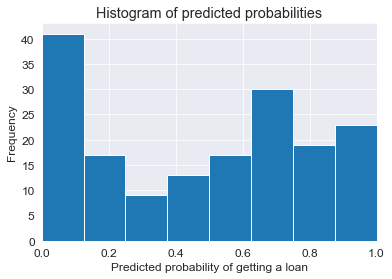

In [276]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of getting a loan')
plt.ylabel('Frequency')


## ROC

In [180]:
from sklearn.metrics import roc_curve

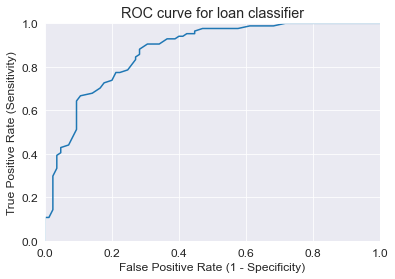

In [376]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for loan classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## AUC
AUC is the percentage of the ROC plot that is underneath the curve:Higher value = better classifier

In [377]:
pred_score = rf.predict_proba(X_test)
# pos_label identify which int number is the positive label
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_score[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)

In [378]:
auc

0.8712885154061625

In [379]:
# calculate cross-validated AUC

from sklearn.model_selection import cross_val_score
cross_val_score(rf, X, y, cv=10, scoring='roc_auc').mean()


0.8914979169962558

## Advantages:
Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.

It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

The algorithm can be used in both classification and regression problems.

Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.

You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

## Disadvantages:

Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.

The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

## Deploy our model on unseen data

In [498]:
unseen=pd.read_csv('test_lAUu6dG.csv')

In [499]:
unseen.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [500]:
unseen.shape

(367, 12)

## Apply previous pre-processing steps

In [501]:
## missing values
imputer = SimpleImputer(strategy='most_frequent')

unseen['Gender'] = imputer.fit_transform(unseen[['Gender']])
unseen['Dependents'] = imputer.fit_transform(unseen[['Dependents']])
unseen['Married'] = imputer.fit_transform(unseen[['Married']])
unseen['Education'] = imputer.fit_transform(unseen[['Education']])
unseen['Self_Employed'] = imputer.fit_transform(unseen[['Self_Employed']])
unseen['Property_Area'] = imputer.fit_transform(unseen[['Property_Area']])


imp_mean = SimpleImputer(strategy='mean')

unseen['LoanAmount'] = imp_mean.fit_transform(unseen[['LoanAmount']])
unseen['Loan_Amount_Term'] = imp_mean.fit_transform(unseen[['Loan_Amount_Term']])

imp_mode = SimpleImputer(strategy='most_frequent')
unseen['Credit_History']= imp_mode.fit_transform(unseen[['Credit_History']])

In [502]:
label_encoder = preprocessing.LabelEncoder()
unseen['Dependents']= label_encoder.fit_transform(unseen['Dependents']) 
unseen['Education']= label_encoder.fit_transform(unseen['Education']) 
unseen['Gender']= label_encoder.fit_transform(unseen['Gender']) 
unseen['Self_Employed']= label_encoder.fit_transform(unseen['Self_Employed']) 
unseen['Property_Area']= label_encoder.fit_transform(unseen['Property_Area']) 
unseen['Married']= label_encoder.fit_transform(unseen['Married']) 

In [503]:
len(unseen.columns)

12

In [504]:
unseen.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [505]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [506]:
unseen_data=unseen.drop('Loan_ID',axis=1)

In [507]:
unseen_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


## Make Predictions

In [508]:
pred_rf = rf.predict(unseen_data.values)
pred_prob_rf = rf.predict_proba(unseen_data.values)

pred_rf

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [509]:
pred_prob_rf

array([[0.38, 0.62],
       [0.64, 0.36],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.5 , 0.5 ],
       [0.37, 0.63],
       [0.67, 0.33],
       [0.24, 0.76],
       [0.52, 0.48],
       [0.53, 0.47],
       [0.74, 0.26],
       [0.38, 0.62],
       [0.53, 0.47],
       [0.43, 0.57],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.61, 0.39],
       [0.58, 0.42],
       [0.49, 0.51],
       [0.57, 0.43],
       [0.33, 0.67],
       [0.6 , 0.4 ],
       [0.38, 0.62],
       [0.58, 0.42],
       [0.77, 0.23],
       [0.53, 0.47],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.29, 0.71],
       [0.53, 0.47],
       [0.56, 0.44],
       [0.58, 0.42],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.41, 0.59],
       [0.51, 0.49],
       [0.41, 0.59],
       [0.65, 0.35],
       [0.58, 0.42],
       [0.52, 0.48],
       [0.59, 0.41],
       [0.56, 0.44],
       [0.52, 0.48],
       [0.55, 0.45],
       [0.54, 0.46],
       [0.52,

In [510]:
rf.predict_proba(X_test)[0:10, 1]

array([0.54, 0.97, 0.14, 0.95, 0.19, 0.02, 0.05, 0.83, 0.2 , 0.03])

In [511]:
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

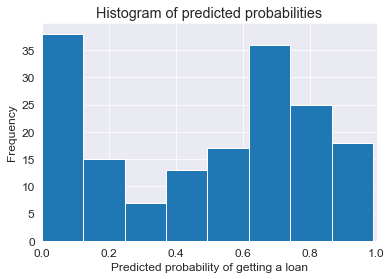

In [512]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of getting a loan')
plt.ylabel('Frequency')


In [513]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_rf, 1)

[0.62,
 0.36,
 0.47,
 0.47,
 0.47,
 0.5,
 0.63,
 0.33,
 0.76,
 0.48,
 0.47,
 0.26,
 0.62,
 0.47,
 0.57,
 0.38,
 0.47,
 0.39,
 0.42,
 0.51,
 0.43,
 0.67,
 0.4,
 0.62,
 0.42,
 0.23,
 0.47,
 0.42,
 0.37,
 0.44,
 0.71,
 0.47,
 0.44,
 0.42,
 0.42,
 0.37,
 0.59,
 0.49,
 0.59,
 0.35,
 0.42,
 0.48,
 0.41,
 0.44,
 0.48,
 0.45,
 0.46,
 0.48,
 0.36,
 0.5,
 0.36,
 0.44,
 0.26,
 0.59,
 0.66,
 0.34,
 0.46,
 0.51,
 0.34,
 0.79,
 0.41,
 0.49,
 0.62,
 0.22,
 0.73,
 0.37,
 0.41,
 0.43,
 0.66,
 0.26,
 0.57,
 0.52,
 0.51,
 0.45,
 0.41,
 0.35,
 0.42,
 0.51,
 0.26,
 0.61,
 0.4,
 0.78,
 0.31,
 0.44,
 0.52,
 0.57,
 0.42,
 0.52,
 0.48,
 0.36,
 0.45,
 0.87,
 0.26,
 0.42,
 0.33,
 0.75,
 0.36,
 0.37,
 0.78,
 0.72,
 0.25,
 0.36,
 0.47,
 0.68,
 0.44,
 0.44,
 0.29,
 0.87,
 0.66,
 0.46,
 0.76,
 0.66,
 0.48,
 0.4,
 0.31,
 0.48,
 0.43,
 0.26,
 0.26,
 0.3,
 0.4,
 0.31,
 0.49,
 0.24,
 0.32,
 0.52,
 0.34,
 0.69,
 0.53,
 0.37,
 0.42,
 0.25,
 0.41,
 0.46,
 0.51,
 0.62,
 0.7,
 0.28,
 0.44,
 0.7,
 0.3,
 0.57,
 0.42,
 0.76,
 0

In [514]:
unseen.copy()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.000000,360.000000,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.000000,360.000000,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.000000,360.000000,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.000000,360.000000,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.000000,360.000000,1.0,2
5,LP001054,1,1,0,1,1,2165,3422,152.000000,360.000000,1.0,2
6,LP001055,0,0,1,1,0,2226,0,59.000000,360.000000,1.0,1
7,LP001056,1,1,2,1,0,3881,0,147.000000,360.000000,0.0,0
8,LP001059,1,1,2,0,0,13633,0,280.000000,240.000000,1.0,2
9,LP001067,1,0,0,1,0,2400,2400,123.000000,360.000000,1.0,1


In [515]:
#Joining the raw data with the predictions

output = unseen.copy()
output['Predictions - Gets Loan or No Loan'] = pred_rf
output['Predictions - Probability to Get Loan'] = column(pred_prob_rf, 1)


output['Predictions - Gets Loan or No Loan'][output['Predictions - Gets Loan or No Loan'] == 0] = 'No'
output['Predictions - Gets Loan or No Loan'][output['Predictions - Gets Loan or No Loan'] == 1] = 'Yes'
output.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predictions - Gets Loan or No Loan,Predictions - Probability to Get Loan
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,Yes,0.62
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,No,0.36
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,No,0.47
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,No,0.47
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,No,0.47


In [516]:
final=output[['Loan_ID','Predictions - Gets Loan or No Loan','Predictions - Probability to Get Loan']]

In [517]:
final.shape

(367, 3)

In [518]:
final.head()

,Loan_ID,Predictions - Gets Loan or No Loan,Predictions - Probability to Get Loan
0,LP001015,Yes,0.62
1,LP001022,No,0.36
2,LP001031,No,0.47
3,LP001035,No,0.47
4,LP001051,No,0.47


## Export to CSV

In [524]:
import os
final.to_csv('Loan Eligibility output.csv')
os. getcwd() 

'D:\\Learning-DataScience\\case studies\\Assignments'